In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import sklearn
from sklearn.model_selection import cross_validate as cv
from sklearn.metrics.pairwise import pairwise_distances

ratings = pd.read_csv('./MovieLens/ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

users = pd.read_csv('./MovieLens/users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

movies = pd.read_csv('./MovieLens/movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [6]:
print(users.head())

   user_id gender zipcode  age_desc              occ_desc
0        1      F   48067  Under 18          K-12 student
1        2      M   70072       56+         self-employed
2        3      M   55117     25-34             scientist
3        4      M   02460     45-49  executive/managerial
4        5      M   55455     25-34                writer


In [7]:
print(ratings.head())

   user_id  movie_id  rating
0        1      1193       5
1        1       661       3
2        1       914       3
3        1      3408       4
4        1      2355       5


In [8]:
print(movies.head())

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


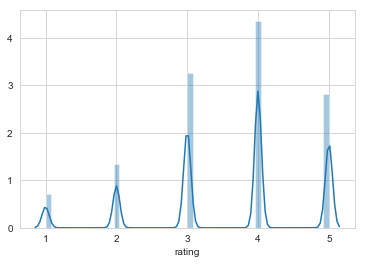

In [13]:
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

In [10]:
dataset = pd.merge(pd.merge(movies, ratings),users)
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


In [12]:
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

In [16]:
small_data = ratings.sample(frac=0.02)

In [17]:
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 162343 to 190694
Data columns (total 3 columns):
user_id     20004 non-null int64
movie_id    20004 non-null int64
rating      20004 non-null int64
dtypes: int64(3)
memory usage: 625.1 KB
None


In [18]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(ratings, reader)

In [19]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.2)

In [20]:
from surprise import SVD, accuracy
model = SVD()
model.fit(trainset)
predictions = model.test(testset)

In [21]:
acc = accuracy.rmse(predictions)

RMSE: 0.8718


In [22]:
acc2 = accuracy.mae(predictions)

MAE:  0.6844


In [23]:
userid = str(50)
movieid = str(2000)

pred = model.predict(userid, movieid, r_ui=3, verbose=True)

user: 50         item: 2000       r_ui = 3.00   est = 3.58   {u'was_impossible': False}


In [24]:
movieid = str(2058)
pred = model.predict(userid, movieid, r_ui=3, verbose=True)

user: 50         item: 2058       r_ui = 3.00   est = 3.58   {u'was_impossible': False}


In [25]:
from surprise import KNNBasic

model = KNNBasic()
model.fit(trainset)
predictions = model.test(testset)
acc = accuracy.rmse(predictions)
acc2 = accuracy.mae(predictions)
print('Accuracy', acc)
print('Accuracy2 mae', acc2)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9214
MAE:  0.7264
('Accuracy', 0.9214006652099672)
('Accuracy2 mae', 0.7263670354843975)


In [29]:
userid = str(1)
movieid = str(1193)
pred = model.predict(userid, movieid, r_ui=5, verbose=True)

user: 1          item: 1193       r_ui = 5.00   est = 3.58   {u'reason': 'User and/or item is unkown.', u'was_impossible': True}


In [28]:
print('look at the first column')

look at the first column
